# Pandas - Exploratory Data Analysis
kita akan meng-explore data menggunakan bantuan Pandas

- handle missing values
- handle invalid values
- merapikan datanya sebisa mungkin
- mencari pattern di data

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

# standard missing values
# non-standard missing values
# unexpected missing values
# summarize missing values
# checking duplicates
# case study
# time series

kita akan menggunakan sample data https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv yang memiliki banyak missing values tipe berbeda-beda.

kita akan handle missing values tersebut.

In [2]:
# 1. import data
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [3]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


NaN adalah standard missing values yang otomatis terdeteksi oleh Pandas sebagai missing value

missing value seperti ini bisa kita rangkum, bisa kita sum total nya ada berapa. bisa kita isi dengan fillna. bisa kita drop dengan dropna. dia terdeteksi sehingga bisa kita gunakan function2 missing value dari pandas.

untuk missing value seperti "--" "na" "-" "n/a" atau lainnya yang tidak dianggap NaN, itu adalah non-standard missing values. tidak dianggap sebagai missing values oleh dataframe kita.

In [4]:
# standard missing values

# for index in df.index:
#     row = df.loc[[index]]
#     display(row)

# cari semua data yang ada missing value di kolom PID
kon_PID_kosong = df["PID"].isnull()

data_PID_kosong = df[kon_PID_kosong]

# untuk setiap baris data di data_PID_kosong, kita isi dengan value baris sebelumnya + 1000
for index in data_PID_kosong.index:
    if (index == 0): continue
    
    df.loc[[index], 'PID'] = float(df.loc[[index-1], 'PID'] + 1000)
    

In [5]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [6]:
# untuk kolom ST_NUM, kita bisa isi missing values nya menggunakan angka rata-rata
st_num_mean = int(df["ST_NUM"].mean())
print(st_num_mean)

df["ST_NUM"] = df["ST_NUM"].fillna(st_num_mean)

191


In [7]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,191.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,191.0,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [8]:
# non-standard missing values
# kalau kita sudah tau bahwa ada bbrp text yang dianggap missing values, seperti "na" atau "--"
# kita bisa minta Pandas untuk membuat value tersebut menjadi NaN saat di import

df2 = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv",
                    na_values = ["na", "--"])

df2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [10]:
# pakai to_numeric dan coerce untuk memastikan tipe data numerik semua di kolom NUM_BATH

pd.to_numeric(df2["NUM_BATH"], errors="coerce")

0    1.0
1    1.5
2    1.0
3    NaN
4    2.0
5    1.0
6    NaN
7    1.0
8    2.0
Name: NUM_BATH, dtype: float64

In [11]:
df2["NUM_BATH"] = pd.to_numeric(df2["NUM_BATH"], errors="coerce")

df2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [12]:
# untuk kolom OWN_OCCUPIED yang isinya hanya Y atau N, kita bisa paksa dia hanya isi Y atau N
# dengan menggunakan tipe data Categorical
pd.Categorical(df2["OWN_OCCUPIED"], categories=["Y","N"])

['Y', 'N', 'N', NaN, 'Y', 'Y', NaN, 'Y', 'Y']
Categories (2, object): ['Y', 'N']

In [13]:
df2["OWN_OCCUPIED"] = pd.Categorical(df2["OWN_OCCUPIED"], categories=["Y","N"])
df2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [14]:
# menghitung jumlah missing values
# kita bisa pakai .isnull()

df2.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,True,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [15]:
# dan ditambah bantuan agregasi .sum()
df2.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        2
SQ_FT           2
dtype: int64

kita bisa lihat total missing values per kolom

In [16]:
# kalau mau overall jumlah missing value di dataframe kita ada berapa, kita bisa tumpuk sum nya
total_missing_values = df2.isnull().sum().sum()
total_missing_values

13

In [17]:
# hitung persentase missing values
total_data = df2.size
total_data

63

In [18]:
print( np.round(total_missing_values / total_data * 100, 2), "% missing values")

20.63 % missing values


In [19]:
# checking duplicates
# case study
# time series

## best practice Data Exploration
1. Introduction: perkenalan data, background data, saat import data kita ada tujuan analisa datanya
2. Data Cleaning: handle missing values, invalid values
3. Exploratory Data Analysis: explorasi data - cari pattern, charts, statistic, mencari tren/ korelasi/ cerita dari data mentah
4. Conclusion: membuat summary, membuat cerita, konklusi hasil analisa data

In [20]:
# checking duplicates

df3 = pd.DataFrame(index=["PUTNAM", "LEXINGTON", "BERKELEY", "LEXINGTON"], data={"NUM_HOUSE": [5,7,7,7]})
df3

,NUM_HOUSE
PUTNAM,5
LEXINGTON,7
BERKELEY,7
LEXINGTON,7


In [21]:
# reset_index() untuk memasukkan index ke kolom, index jadi angka urut
df3 = df3.reset_index()
df3

,index,NUM_HOUSE
0,PUTNAM,5
1,LEXINGTON,7
2,BERKELEY,7
3,LEXINGTON,7


In [22]:
# ganti judul kolom
df3 = df3.rename(columns={"index":"STREET_NAME"})
df3

,STREET_NAME,NUM_HOUSE
0,PUTNAM,5
1,LEXINGTON,7
2,BERKELEY,7
3,LEXINGTON,7


In [23]:
# cek duplikat
df3.duplicated()

0    False
1    False
2    False
3     True
dtype: bool

In [24]:
# kita bisa pakai sebagai kondisi
data_yang_duplikat = df3.duplicated()

df3[data_yang_duplikat]

,STREET_NAME,NUM_HOUSE
3,LEXINGTON,7


note: fungsi duplicated() hanya mengecek value yang sama persis antara rows di semua kolom, tidak cek index nya

In [25]:
# cara cepat menghapus duplicated data
df3.drop_duplicates()

,STREET_NAME,NUM_HOUSE
0,PUTNAM,5
1,LEXINGTON,7
2,BERKELEY,7


In [26]:
# jangan lupa untuk replace data awal kita ke data yang baru, yang sudah dihapus duplikatnya
df3 = df3.drop_duplicates()
df3

,STREET_NAME,NUM_HOUSE
0,PUTNAM,5
1,LEXINGTON,7
2,BERKELEY,7


# case study
kita coba import file excel dan kita lakukan:
1. introduction
2. data cleaning
3. data exploration

In [27]:
obes_xls = pd.ExcelFile("dataset/obes.xls")

In [28]:
# pip install xlrd

In [29]:
# ada sheet apa saja di file Excel ini?
obes_xls.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [30]:
# minta sheet 7.2 tentang jumlah obesitas tahun ke tahun per braket umur
obes_xls.parse('7.2')

,"Table 7.2 Finished Admission Episodes with a primary diagnosis of obesity, by age group, 2002/03 to 2012/13",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Numbers
3,NaN,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2002/03,1275,400,65,136,289,216,94,52,23
6,2003/04,1711,579,67,174,391,273,151,52,24
7,2004/05,2035,547,107,287,487,364,174,36,32
8,2005/06,2564,583,96,341,637,554,258,72,20
9,2006/07,3862,656,184,461,1069,872,459,118,43


In [31]:
# kita skip baris2 data yang tidak kita perlukan - lihat di file excel kalau data kita ada di tengah2
df_obes_by_age =obes_xls.parse('7.2', skiprows=4, skipfooter=14)
df_obes_by_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [32]:
df_obes_by_age = df_obes_by_age.rename(columns={"Unnamed: 0": "Year"})
df_obes_by_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [33]:
df_obes_by_age.isnull().sum()

Year           1
Total          1
Under 16       1
16-24          1
25-34          1
35-44          1
45-54          1
55-64          1
65-74          1
75 and over    1
dtype: int64

In [34]:
df_obes_by_age = df_obes_by_age.dropna()
df_obes_by_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [35]:
df_obes_by_age["Year"] = df_obes_by_age["Year"].str.slice(0, 4)
df_obes_by_age

C:\Users\stefa\AppData\Local\Temp\ipykernel_2332\1209240573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obes_by_age["Year"] = df_obes_by_age["Year"].str.slice(0, 4)


,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [36]:
df_obes_by_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 968.0+ bytes


In [37]:
df_obes_by_age["Year"] = pd.to_numeric(df_obes_by_age["Year"])
df_obes_by_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11 non-null     int64  
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 968.0 bytes


C:\Users\stefa\AppData\Local\Temp\ipykernel_2332\3516287423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obes_by_age["Year"] = pd.to_numeric(df_obes_by_age["Year"])


In [38]:
# karena kolom Year bersifat unik, aku bisa set index menjadi kolom Year
# ini memudahkan kita bisa pakai .loc[tahun] untuk ambil data tahun tertentu

df_obes_by_age[df_obes_by_age["Year"] == 2002]

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0


In [39]:
# set index ke kolom Year
df_obes_by_age = df_obes_by_age.set_index("Year")
df_obes_by_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [40]:
df_obes_by_age.loc[[2002]]

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0


data sudah kita import, sudah kita cleaning, berikutnya untuk explorasi kita gunakan plot() membuat chart visual

<AxesSubplot:xlabel='Year'>

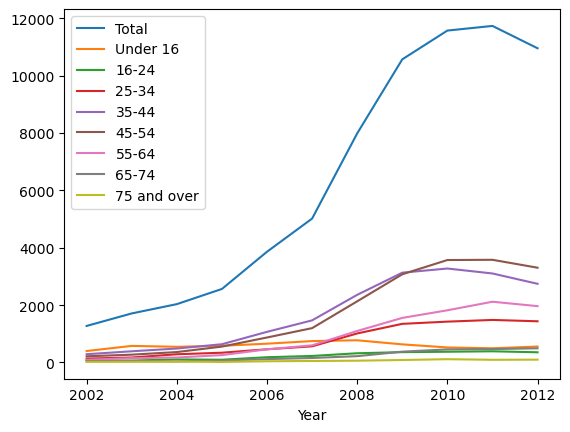

In [41]:
df_obes_by_age.plot()

kolom Total tidak membantu perbandingan tren obesitas per tahun antar grup umur. Jadi kita bisa drop dulu kolom Total baru buat visualisasi lagi.

In [42]:
df_oa = df_obes_by_age.drop(columns=["Total"])
df_oa

,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,
2002,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

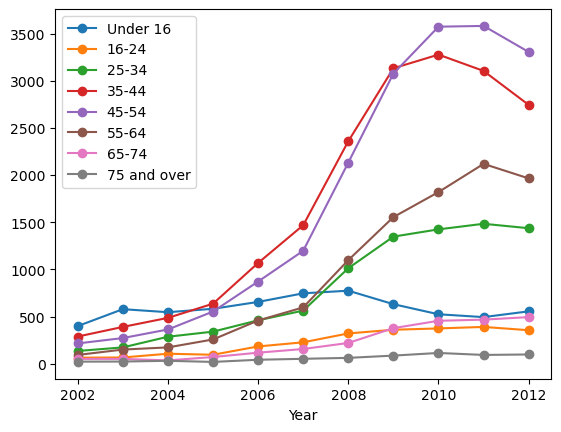

In [43]:
df_oa.plot(marker="o")

dari grafik diatas, kita bisa melihat kalau braket umur 35-54 yang paling banyak bertambah pasien obesitasnya. Terutama antara tahun 2006 - 2010. Walaupun 2 tahun terakhir di 2010-2012 ada sedikit penurunan, tapi tidak sebanding dengan jumlah obesitas yang meningkat di kelompok umur tersebut.

kita juga bisa melihat grup kedua yang paling banyak bertambah pasien obesitasnya adalah yang +- dari 35-54, yaitu braket umur 25-34 dan 55-64.

sementara untuk anak-anak dan orang dewasa dibawah 24 tahun, dan yang berumur diatas 65 tahun, jumlah pasien obesitas tidak terlalu banyak berubah. ada sedikit naik turun, ada yg sedikit naik, dan yang 75+ sangat stabil hampir tidak ada pasien obesitas.

# Time Series
kita akan mempelajari tipe data datetime di Python

dan cara menggunakannya, termasuk di sebuah dataframe

In [44]:
# date_range dari pandas untuk membuat urutan tanggal

date_list = pd.date_range(start="8-1-2023", end="10-1-2023", freq="D")
date_list

DatetimeIndex(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
               '2023-08-05', '2023-08-06', '2023-08-07', '2023-08-08',
               '2023-08-09', '2023-08-10', '2023-08-11', '2023-08-12',
               '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20',
               '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
               '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28',
               '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
               '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05',
               '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09',
               '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17',
               '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
               '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
      

In [45]:
len(date_list)

62

In [46]:
visitors = np.round(np.random.random(62)*100)
visitors

array([39., 17., 66., 66.,  5., 30., 98.,  7., 92.,  2., 22., 22., 23.,
       90., 65., 74., 59.,  6., 64., 89., 35., 84., 93., 91., 50., 68.,
       92., 44., 77., 17., 57., 63., 88., 61., 34., 64., 59., 51., 26.,
       10., 86., 48., 40., 94., 12., 66., 41., 84., 80., 10., 71., 77.,
       19.,  6., 43., 56., 65., 45., 42., 86., 91.,  7.])

In [47]:
# anggap kita punya website, sehari ada berapa visitor
# bikin dummy data (data palsu bikin sendiri)

df_dummy_visitor = pd.DataFrame({'date': date_list, 'visitor_count': visitors})
df_dummy_visitor

,date,visitor_count
0,2023-08-01,39.0
1,2023-08-02,17.0
2,2023-08-03,66.0
3,2023-08-04,66.0
4,2023-08-05,5.0
...,...,...
57,2023-09-27,45.0
58,2023-09-28,42.0
59,2023-09-29,86.0
60,2023-09-30,91.0


In [48]:
df_dummy_visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           62 non-null     datetime64[ns]
 1   visitor_count  62 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [49]:
# karena tanggal sudah pasti unik, kita bisa pakai tanggal sebagai index
df_dummy_visitor = df_dummy_visitor.set_index('date')
df_dummy_visitor

,visitor_count
date,
2023-08-01,39.0
2023-08-02,17.0
2023-08-03,66.0
2023-08-04,66.0
2023-08-05,5.0
...,...
2023-09-27,45.0
2023-09-28,42.0
2023-09-29,86.0


In [50]:
# kita bisa minta data tertentu menggunakan tanggal pakai .loc

# ambil data antara 2 tanggal
df_dummy_visitor.loc['2023-08-03':'2023-08-05']

,visitor_count
date,
2023-08-03,66.0
2023-08-04,66.0
2023-08-05,5.0


In [51]:
# ambil data di tanggal tertentu
df_dummy_visitor.loc['2023-08-03']

visitor_count    66.0
Name: 2023-08-03 00:00:00, dtype: float64

In [52]:
# ambil data di beberapa tanggal
df_dummy_visitor.loc[['2023-08-03','2023-08-05']]

,visitor_count
date,
2023-08-03,66.0
2023-08-05,5.0


In [53]:
# ambil data di bulan dan tahun tertentu
df_dummy_visitor.loc['2023-08']

,visitor_count
date,
2023-08-01,39.0
2023-08-02,17.0
2023-08-03,66.0
2023-08-04,66.0
2023-08-05,5.0
2023-08-06,30.0
2023-08-07,98.0
2023-08-08,7.0
2023-08-09,92.0


In [54]:
# ambil khusus tanggal 5
df_dummy_visitor.loc[df_dummy_visitor.index.day==5]

,visitor_count
date,
2023-08-05,5.0
2023-09-05,64.0


In [55]:
# ambil selain tanggal 5
df_dummy_visitor.loc[df_dummy_visitor.index.day!=5]

,visitor_count
date,
2023-08-01,39.0
2023-08-02,17.0
2023-08-03,66.0
2023-08-04,66.0
2023-08-06,30.0
2023-08-07,98.0
2023-08-08,7.0
2023-08-09,92.0
2023-08-10,2.0


In [56]:
# ambil khusus bulan 8
df_dummy_visitor.loc[df_dummy_visitor.index.month==8]

,visitor_count
date,
2023-08-01,39.0
2023-08-02,17.0
2023-08-03,66.0
2023-08-04,66.0
2023-08-05,5.0
2023-08-06,30.0
2023-08-07,98.0
2023-08-08,7.0
2023-08-09,92.0


In [57]:
# ambil khusus hari senin, weekday 0
df_dummy_visitor.loc[df_dummy_visitor.index.weekday==0]

,visitor_count
date,
2023-08-07,98.0
2023-08-14,90.0
2023-08-21,35.0
2023-08-28,44.0
2023-09-04,34.0
2023-09-11,48.0
2023-09-18,80.0
2023-09-25,56.0


In [58]:
df_dummy_visitor.index

DatetimeIndex(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
               '2023-08-05', '2023-08-06', '2023-08-07', '2023-08-08',
               '2023-08-09', '2023-08-10', '2023-08-11', '2023-08-12',
               '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20',
               '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
               '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28',
               '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
               '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05',
               '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09',
               '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17',
               '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
               '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
      

In [59]:
# selain dipakai sebagai index, kita bisa pakai juga sebagai data baru
df_dummy_visitor.index.weekday

Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
            3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='date')

In [60]:
# kita bisa buat kolom baru untuk weekday, contohnya
df_dummy_visitor["Weekday"] = df_dummy_visitor.index.weekday

df_dummy_visitor.head()

,visitor_count,Weekday
date,,
2023-08-01,39.0,1
2023-08-02,17.0,2
2023-08-03,66.0,3
2023-08-04,66.0,4
2023-08-05,5.0,5


In [61]:
# bikin list
# week_hari = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
# df_dummy_visitor["hari"] = df_dummy_visitor["Weekday"]

In [62]:
# strptime dari package datetime digunakan untuk mengconvert tanggal dari string jadi datetime

str_dates = ['June-01-2020', 'June-02-2020', 'June-03-2020']

dt2 = [datetime.strptime(x,'%B-%d-%Y') for x in str_dates]
dt2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

%B adalah bulan dalam bentuk full January , February,...

%d adalah tanggal dengan 2 angka, 01,02,...31

%Y adalah tahun dengan 4 angka, 2000,2001

In [63]:
# balik ke data tadi
df_dummy_visitor.head()

,visitor_count,Weekday
date,,
2023-08-01,39.0,1
2023-08-02,17.0,2
2023-08-03,66.0,3
2023-08-04,66.0,4
2023-08-05,5.0,5


data ini berjalan hari ke hari, kira kira bagaimana caranya kalau kita mau kelompokin datanya per braket waktu terntu?
per minggu, per bulan, per tahun?

kita pakai resample

# Resample

mirip grouping dan agregate, kalau sudah kita resample (banyak data digabung jadi 1), kita perlu kasih tau agregasi data di kolom2 lain digabungnya dengan cara apa (sum, mean, max, min, ..?)

In [64]:
df_dummy_visitor.drop(columns=['Weekday']).resample('W').mean()

,visitor_count
date,
2023-08-06,37.166667
2023-08-13,38.000000
2023-08-20,63.857143
2023-08-27,73.285714
2023-09-03,58.142857
2023-09-10,47.142857
2023-09-17,55.000000
2023-09-24,43.714286
2023-10-01,56.000000


rata rata jumlah visitor per hari di 1 minggu tertentu.

In [65]:
# kalau mau per 2 minggu
df_dummy_visitor.drop(columns=['Weekday']).resample('2W').mean()

,visitor_count
date,
2023-08-06,37.166667
2023-08-20,50.928571
2023-09-03,65.714286
2023-09-17,51.071429
2023-10-01,49.857143


In [66]:
# minta sum juga bisa
df_dummy_visitor.drop(columns=['Weekday']).resample('W').sum()

,visitor_count
date,
2023-08-06,223.0
2023-08-13,266.0
2023-08-20,447.0
2023-08-27,513.0
2023-09-03,407.0
2023-09-10,330.0
2023-09-17,385.0
2023-09-24,306.0
2023-10-01,392.0


# Rolling
mencari total x waktu terakhir

misalkan total 3 hari terakhir, 2 minggu terakhir, dan datanya tidak di resample

In [67]:
df_dummy_visitor["total 7 hari"] = df_dummy_visitor.drop(columns=['Weekday']).rolling(7).sum()

In [69]:
df_dummy_visitor.drop(columns=['Weekday']).head(10)

,visitor_count,total 7 hari
date,,
2023-08-01,39.0,NaN
2023-08-02,17.0,NaN
2023-08-03,66.0,NaN
2023-08-04,66.0,NaN
2023-08-05,5.0,NaN
2023-08-06,30.0,NaN
2023-08-07,98.0,321.0
2023-08-08,7.0,289.0
2023-08-09,92.0,364.0


In [70]:
# kalau di backfill, yang NaN akan diisi data pertama, si 321 di tanggal 7 aug
df_dummy_visitor['rolling_sum_backfilled'] = df_dummy_visitor['total 7 hari'].fillna(method='backfill')

In [71]:
df_dummy_visitor.head(10)

,visitor_count,Weekday,total 7 hari,rolling_sum_backfilled
date,,,,
2023-08-01,39.0,1,NaN,321.0
2023-08-02,17.0,2,NaN,321.0
2023-08-03,66.0,3,NaN,321.0
2023-08-04,66.0,4,NaN,321.0
2023-08-05,5.0,5,NaN,321.0
2023-08-06,30.0,6,NaN,321.0
2023-08-07,98.0,0,321.0,321.0
2023-08-08,7.0,1,289.0,289.0
2023-08-09,92.0,2,364.0,364.0
